In [2]:
import open3d as o3d
import numpy as np
import math
import os



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
def normalization(vertices):
  vertices=vertices - np.mean(vertices, axis=0)
  max_distance = np.max(np.sqrt(np.abs(np.sum(vertices**2, axis=1))))
  vertices_normalized=vertices / max_distance
  return vertices_normalized

In [6]:
mesh= o3d.io.read_triangle_mesh('/mnt/d/junch_data/test_junch/Scan/Scan.obj')
np.asarray(mesh.triangles)

array([[     0,      1,      2],
       [     3,      4,      5],
       [     6,      7,      8],
       ...,
       [906265, 906266, 906267],
       [906268, 906269, 906270],
       [906271, 906272, 906273]], dtype=int32)

In [16]:
mesh= o3d.io.read_triangle_mesh('/mnt/d/junch_data/test_junch/Scan/Scan.obj',enable_post_processing=True)
mesh.vertices=o3d.cuda.pybind.utility.Vector3dVector(normalization(np.asarray(mesh.vertices)))
#mesh.triangles=o3d.cuda.pybind.utility.Vector3iVector(normalization(np.asarray(mesh.triangles)))
output_file='./Scan/normalied_obj4.obj'
o3d.io.write_triangle_mesh(output_file, mesh,write_triangle_uvs=True)


True

In [6]:
#---------------Make the data----------------------------
import os
import torch
import matplotlib.pyplot as plt
# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions 
import sys
import os



In [7]:
sys.path.append(os.path.abspath(''))
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
DATA_DIR = "./Scan/"
obj_filename = os.path.join(DATA_DIR, "normalied_obj4.obj")

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

In [8]:
# mesh = o3d.io.read_triangle_mesh(obj_filename)

In [9]:
# mesh.vertices = o3d.cpu.pybind.utility.Vector3dVector(normalization(np.asarray(mesh.vertices)))

In [10]:
# o3d.io.write_triangle_mesh(obj_filename, mesh)

(-0.5, 632.5, 606.5, -0.5)

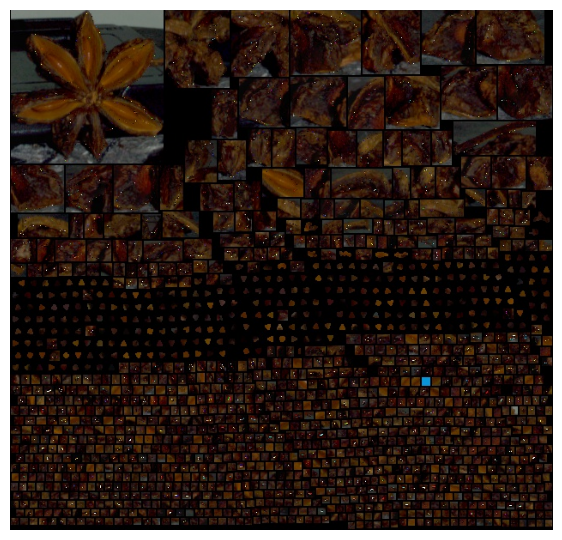

In [11]:
plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off")

(-0.5, 1023.5, 1023.5, -0.5)

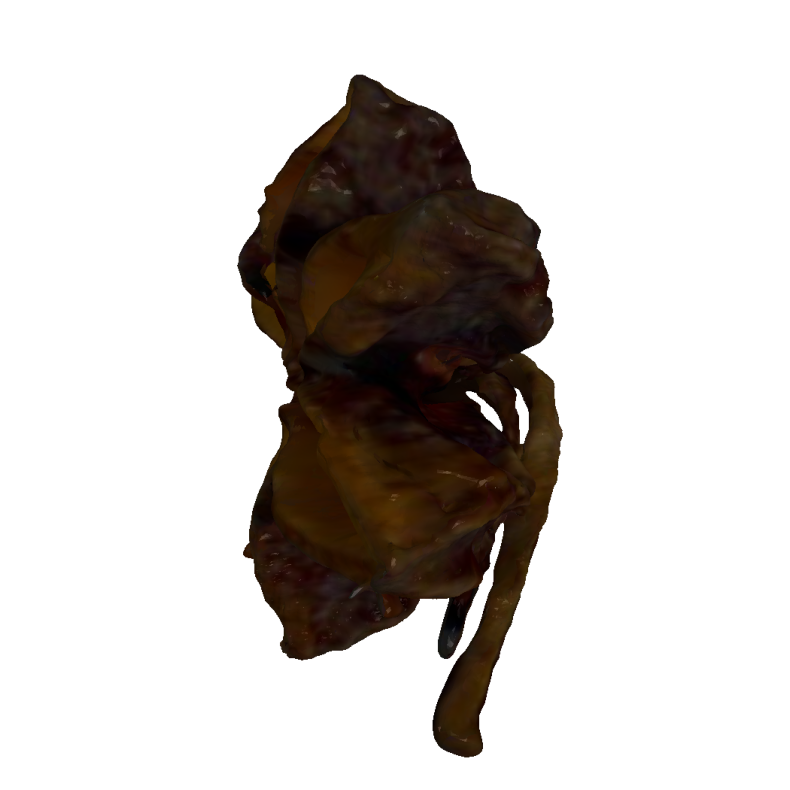

In [14]:

R, T = look_at_view_transform(2, 0, 150) 
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that 
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for 
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of 
# the difference between naive and coarse-to-fine rasterization. 
raster_settings = RasterizationSettings(
    image_size=1024, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

# Place a point light in front of the object. As mentioned above, the front of the cow is facing the 
# -z direction. 
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will 
# interpolate the texture uv coordinates for each vertex, sample from a texture image and 
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device, 
        cameras=cameras,
        lights=lights
    )
)
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")

In [9]:
import os
import shutil

# 定义当前工作目录和目标文件夹名
current_directory = os.getcwd()
target_directory = "/mnt/d/junch_data/test_junch/anise1/"



# 获取当前工作目录下的所有文件夹
folders = [folder for folder in os.listdir(current_directory) if os.path.isdir(os.path.join(current_directory, folder))]

# 遍历文件夹列表
for folder in folders:
    if folder.startswith("anise_"):
        # 构建源文件夹路径和目标文件夹路径
        source_path = os.path.join(current_directory, folder)
        print(source_path)
        target_path = os.path.join(target_directory, folder)
        print(target_path)
        
        # 移动文件夹到目标位置
        shutil.move(source_path, target_path)
    else:
        print("no")

print("已完成移动文件夹操作。")

no
no
no
已完成移动文件夹操作。


In [2]:
current_directory

'/mnt/d/junch_data/test_junch'

In [3]:
folders

['anise1',
 'anise_001',
 'anise_002',
 'anise_003',
 'anise_004',
 'anise_005',
 'anise_006',
 'anise_007',
 'anise_008',
 'anise_009',
 'anise_010',
 'anise_011',
 'anise_012',
 'anise_013',
 'anise_014',
 'anise_015',
 'anise_016',
 'anise_017',
 'anise_018',
 'anise_019',
 'anise_020',
 'anise_021',
 'anise_022',
 'anise_023',
 'anise_024',
 'anise_025',
 'anise_026',
 'anise_027',
 'anise_028',
 'anise_029',
 'output_sh',
 'Scan']

In [1]:
import sys
import open3d as o3d
import numpy as np
import math
import os

def normalization(vertices):
  vertices=vertices - np.mean(vertices, axis=0)
  max_distance = np.max(np.sqrt(np.abs(np.sum(vertices**2, axis=1))))
  vertices_normalized=vertices / max_distance
  return vertices_normalized

#/mnt/d/junch_data/test_junch/anise1/anise_001/Scan/Scan.obj
def runall(filepaths):
    for filepath in filepaths:
        #print(filepath)
        output_path='/mnt/d/junch_data/test_junch/anise1_normalized/'+filepath.split("/")[7]+'_normalized.obj'
        print(output_path)
        mesh= o3d.io.read_triangle_mesh(filepath,enable_post_processing=True)
        mesh.vertices=o3d.cuda.pybind.utility.Vector3dVector(normalization(np.asarray(mesh.vertices)))
        output_file=output_path
        o3d.io.write_triangle_mesh(output_file, mesh,write_triangle_uvs=True)

foldernames=[]
for i in range(2,30):
    formatted_number = str(i).zfill(3)
    foldernames.append('anise_'+formatted_number)


patharray=[]
for foldername in foldernames:
    for curDir, dirs, files in os.walk(top="/mnt/d/junch_data/test_junch/anise1/alldata_anise1/"+foldername+"/Scan/"):
        for file in files:
            if file.endswith(".obj"):
                path=os.path.join(curDir,file)
                patharray.append(path)
                
                
patharray = sorted(patharray)[4:10]


# sysarg=sys.argv[1]
# index=int(sysarg)-1
runall(patharray)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
/mnt/d/junch_data/test_junch/anise1_normalized/anise_006_normalized.obj
/mnt/d/junch_data/test_junch/anise1_normalized/anise_007_normalized.obj
/mnt/d/junch_data/test_junch/anise1_normalized/anise_008_normalized.obj
/mnt/d/junch_data/test_junch/anise1_normalized/anise_009_normalized.obj
/mnt/d/junch_data/test_junch/anise1_normalized/anise_010_normalized.obj
/mnt/d/junch_data/test_junch/anise1_normalized/anise_011_normalized.obj


In [23]:
patharray[0]


'/mnt/d/junch_data/test_junch/anise1/alldata_anise1/anise_002/Scan/Scan.obj'

In [24]:
#/mnt/d/junch_data/test_junch/anise1/alldata_anise1/anise_002/Scan/Scan.obj
mesh= o3d.io.read_triangle_mesh(patharray[0],enable_post_processing=True)